# PeNSE 2015: Influência parental no bem-estar da criança

por Kaio Oliveira Peixoto
<br>
[Linkedin](https://www.linkedin.com/in/kaiopeixoto/)
<br>
[Github](https://github.com/KPxto?tab=overview&from=2021-03-01&to=2021-03-17)

### Base da Dados: PeNSE 2015

O PeNSE (Pesquisa Nacional de Saúde Escolar) foi uma pesquisa feita em 2015 com alunos de escolas públicas e privadas dos 12 aos 19 anos de idade. Como a própria sigla já diz, a pesquisa contém dados sócio econômicos, de saúde e de contexto social do aluno tais como, ambiente familiar, saúde física, saúde emocional, hábitos alimentares e de atividade física, exposição à violência doméstica e urbana, bullying, dentre outros.
<br>

Este estudo visa uma análise descritiva focando na influência parental sobre o bem estar da criança. Ou seja, investigaremos o quanto a condição de ter pais separados influencia no bem estar emocional dos entrevistados. Em consequência, analisaremos também se a situação parental influencia na iniciação ao uso de drogas.

Fonte da pesquisa: https://www.ibge.gov.br/estatisticas/sociais/populacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=sobre
<br>

Veja abaixo um vídeo do IBGE com mais informações sobre a pesquisa:

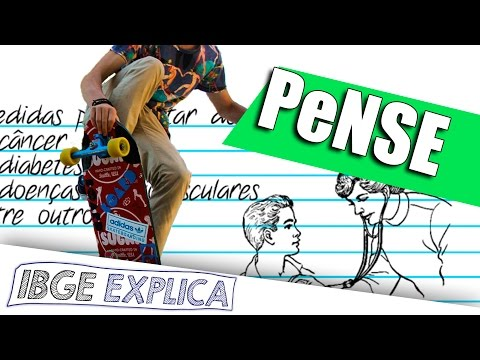

In [38]:
from IPython.display import YouTubeVideo
YouTubeVideo('z4BBCHZUvD4',width = 800, height=600)

### Conclusões do estudo

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from zipfile import ZipFile

### Leitura dos arquivos

In [12]:
zip = ZipFile('PeNSE_2015_AMOSTRA2.zip')

In [13]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [14]:
caminho_zip = zip.namelist()[1]

In [15]:
dados = pd.read_csv(zip.open(caminho_zip), sep=';', thousands='.', decimal=',')

In [16]:
caminho_dicio = zip.namelist()[12]
dicio_dados = pd.read_excel(zip.open(caminho_dicio))
df_dict = dicio_dados.copy()
dicio_dados.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


### Funções

**Vamos criar uma função que retornará um dicionário condicionando nossas perguntas e respostas**

In [17]:
# esta função retornará um dicionário que traduzirá os códigos de cada pergunta do questionário
# facilita para não ficarmos consultando as informações a todo momento
def dados_dict(pergunta, df=dicio_dados):
    try:
        result_dict = {}
        question = df[df['VARIÁVEL']==pergunta]['QUESTIONÁRIO DO ALUNO']
        result_dict['pergunta'] = question.values[0]

        lista = []
        indice = question.index[0] + 1
        alternativas = df.iloc[indice]['VARIÁVEL']

        while str(alternativas).isnumeric():
            lista.append([alternativas, df.iloc[indice]['QUESTIONÁRIO DO ALUNO']])
            indice += 1
            alternativas = df.iloc[indice]['VARIÁVEL']
            result_dict['Resp'] = dict(lista)

        return result_dict
    except IndexError:
        print('Erro de Indice. O código da questao está errado')

**Convertendo chaves de dicionário para tipo inteiro**

In [18]:
# esta função converterá as chaves dos dicionários de perguntas e respostas de string para inteiro
# só quando as chaves estiverem como inteiro que será possível mapear as informações
def dic_type_convert(dic):
    new_dic = {}
    for k, v in dic.items():
        if str(k).isnumeric():
            k = int(k)
            new_dic[k] = v
        
    return new_dic

**Função para criação de tabela de frequência**

In [19]:
def tab_freq(cod): 
    indice = dados[cod].value_counts().index.map(dic_type_convert(dados_dict(cod)['Resp']))
    valores = dados[cod].value_counts().values
    percent = round(dados[cod].value_counts(normalize=True)*100, 2).values
    df = pd.DataFrame({'frequencia':valores, 'percent (%)':percent}, index=indice)
    return df

### Análise Exploratória

Visualizando as primeiras linhas do nosso conjunto de dados

In [20]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


**Vamos verificar quantas perguntas existem no questionário e quantas pessoas responderam**

In [21]:
print(f'{dados.shape[0]} alunos participaram da pesquisa \n{dados.shape[1]} perguntas foram respondidas')

16556 alunos participaram da pesquisa 
181 perguntas foram respondidas


**Checando nulos**

In [22]:
s_null = dados.isna().sum()
s_null.sum()

432

**Checando quais colunas contém nulos**

In [23]:
s_null[s_null>0]

TEMPODESLOC     33
TEMPOTOTAL      20
TEMPOEDFIS      84
TEMPOEXTRA      93
TEMPOEST       110
VB17001         45
VB17002         47
dtype: int64

>Podemos ver que das 181 colunas, apenas 7 contém valores nulos. Vejamos então quais perguntas são essas e se as mesmas estão relacionadas com nossa análise.

In [24]:
for pergunta in s_null[s_null>0].index.to_list():
    print(f"{str(pergunta)}: {dados_dict(pergunta)['pergunta']}'\n--")

TEMPODESLOC: Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.'
--
TEMPOTOTAL: A atividade física acumulada foi estimada calculando o produto entre o número de dias e o tempo médio que os escolares gastam em atividades físicas, nos sete dias anteriores à pesquisa, considerando os seguintes domínios: ir e voltar da escola, aulas de educação física e outras atividades extraescolares. Em minutos.'
--
TEMPOEDFIS: Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.'
--
TEMPOEXTRA: Refere-se ao tempo médio diário acumulado pelo escolar com a prática de alguma atividade física extraescolar como esportes, dança, ginástica, musculação, lutas ou outra atividade, nos últimos sete dias anteriores à data da pesquisa. 

>Podemos ver que as questões com valores nulos referem-se predominantemente à situações sobre atividade física e dados biométricos. Como este não é o escopo da nossa pesquisa, não vamos nos preocupar com estes valores nulos, que vamos desconsiderar a partir de agora, e partiremos para as próximas etapas.

**Removendo colunas com valores nulos**

In [25]:
cols = dados.columns.to_list()
for item in s_null[s_null>0].index.to_list():
    cols.remove(item)
print(f"Dataset original: {len(dados.columns)} colunas\nDataset modificado: {len(cols)} colunas")

Dataset original: 181 colunas
Dataset modificado: 174 colunas


In [26]:
# agora vamos atribuir as novas colunas ao nosso conjunto de dados
dados = dados[cols]

In [27]:
# checando valores nulos do novo conjunto de dados
dados.isna().sum().sum()

0

### Conhecendo o público pesquisado

Vamos conhecer algumas características do nosso público pesquisado através de tabelas de frequência. A ordem na tabela é decrescente, ou seja, os objetos que aparecem com maior frequencia aparecem primeiro.

**Distribuição por Região**

In [28]:
tab_freq('REGEOGR')

,frequencia,percent (%)
Nordeste,3465,20.93
Centro-Oeste,3420,20.66
Sudeste,3276,19.79
Sul,3207,19.37
Norte,3188,19.26


>Há uma distribuição bem igualitária entre cada uma das 5 regiões do Brasil, com cada uma contribuindo com cerca de 20% dos entrevistados.

**Distribuição por Sexo**

In [29]:
tab_freq('VB01001')

,frequencia,percent (%)
Masculino,8287,50.05
Feminino,8269,49.95


>Distribuição bem parecida entre pessoas de ambos sexos, com praticamente 50% para cada lado.

**Distribuição por cor/raça**

In [30]:
tab_freq('VB01002')

,frequencia,percent (%)
Parda,6726,40.63
Branca,6575,39.71
Preta,1939,11.71
Amarela,712,4.30
Indígena,581,3.51
Não informado,23,0.14


>Aqui vemos uma predominancia da cor parda. Este é um assunto bem controverso num país tão miscigenado como o Brasil. Este grupo compreende uma variedade diversa de cores, abrangendo tanto pessoas que são predominantemente pretas, brancas, amarelas ou índigenas. Ou seja, este é um termo que refere-se à brasileiros com variadas ascendências étnicas, o que pode causar uma confusão na autodeclaração de cor e raça. Virtualmente qualquer brasileiro pode ser incluído neste grupo.

**Distribuição por Idade**

In [31]:
tab_freq('VB01003')

,frequencia,percent (%)
12 anos,2634,15.91
13 anos,2561,15.47
15 anos,2425,14.65
16 anos,2270,13.71
14 anos,2133,12.88
11 anos ou menos,2072,12.52
17 anos,1537,9.28
18 anos,563,3.40
19 anos ou mais,361,2.18


>Idade

**Ambições do aluno sobre o grau de escolaridade pretendido**

Vemos aqui que a maioria pretende chegar até a pós-graduação.

In [32]:
tab_freq('VB01025')

,frequencia,percent (%)
Pós-graduação,6981,42.17
Não sei,3330,20.11
Ensino Superior,2564,15.49
Ensino Médio,1641,9.91
Ensino Fundamental,1369,8.27
Ensino Médio Técnico,657,3.97
Não informado,14,0.08


In [35]:
tab_freq('VB01022')

,frequencia,percent (%)
Manhã,9198,55.56
Tarde,5362,32.39
Noite,1258,7.60
Integral,651,3.93
Intermediário,83,0.50
Não informado,4,0.02


In [ ]:
dicio_dados[dicio_dados['VARIÁVEL'].str.contains('VB01')==True]['QUESTIONÁRIO DO ALUNO'].to_list()

**Perguntas selecionadas**

In [ ]:
lista_perguntas = ['VB01001', 'VB01002', 'VB01003', 'VB01021', 'VB01022', 'VB01025', 'VB01026', ]

In [ ]:
# fazer uma coluna para saber quem mora com somente um dos pais
mae = dados['VB01006'].map(dic_type_convert(dados_dict('VB01006')['Resp']))
pai = dados['VB01007'].map(dic_type_convert(dados_dict('VB01007')['Resp']))
pais = pd.DataFrame({'mae':mae, 'pai':pai})

# um dos valores da coluna mae veio com um espaço em branco e vamos tira-lo aqui
pais['mae'].replace({'Não ':'Não'}, inplace=True)

# aqui vamos criar uma nova coluna que informa se a criança mora com os 2 pais ou não
pais['2_pais'] = (pais['mae']=='Sim') & (pais['pai']=='Sim')
pais['2_pais'] = pais['2_pais'].map({False:'Não', True:'Sim'})
pais['so_mae'] = (pais['mae']=='Sim') & (pais['pai']=='Não')
pais['so_mae'] = pais['so_mae'].map({False:'Não', True:'Sim'})
pais['so_pai'] = (pais['pai']=='Sim') & (pais['mae']=='Não')
pais['so_pai'] = pais['so_pai'].map({False:'Não', True:'Sim'})
pais['sem_pais'] = ((pais['mae']=='Não') & (pais['pai']=='Não')).map({True:'Sim', False:'Não'})
pais[pais['sem_pais']=='Sim'].sample(20)

In [ ]:
(pais['mae']=='Sim') & (pais['pai']=='Sim')

In [ ]:
pais.query("mae=='Sim' & pai=='Sim'")

In [ ]:
idx = pd.Index(dados['VB01002'].map(dic_type_convert(dados_dict('VB01002')['Resp'])), name='index')
c = round(pd.crosstab(index=idx, columns=pais['2_pais'], normalize='index')*100, 2)
c = c.rename_axis('cor_raça', axis='index')
c = c.rename_axis('pais_juntos', axis='columns')

In [ ]:
c

In [ ]:
idx = pd.Index(dados['VB01008A'].map(dic_type_convert(dados_dict('VB01008A')['Resp'])), name='index')
c = round(pd.crosstab(index=idx, columns=pais['2_pais'], normalize='index')*100, 2)
c = c.rename_axis('pretensao_mae', axis='index')
c = c.rename_axis('pais_juntos', axis='columns')
c